In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download('punkt')
nltk.download('stopwords')


data = pd.read_csv('../../rhyme_analyzed_poems.csv')
print("Podgląd danych:")
print(data.head(5))

Podgląd danych:
             author                            title  \
0  Tadeusz Miciński          (Jak zwiędłe liście...)   
1  Tadeusz Miciński         (Jaki lekki — zwinny...)   
2  Tadeusz Miciński               (Jesienne lasy...)   
3  Tadeusz Miciński          (Kiedy odejdę w dal...)   
4  Maria Konopnicka  (Kto w mogiłę wrasta głazem...)   

                                             content   genre  \
0  Jak zwiędłe liście czernią me kroki na śniegu....  Wiersz   
1  Jaki lekki — zwinny — chybki —\nsunę przez zar...  Wiersz   
2  Jesienne lasy poczerwienione\ngoreją w cudnym ...  Wiersz   
3  Kiedy odejdę w dal\nzostanie po mnie żal —\nda...  Wiersz   
4  Kto w mogiłę wrasta głazem,\nKto skamieniał na...  Wiersz   

                                              motifs  \
0  Noc, Śmierć, Natura, Cisza, Mistycyzm, Przemij...   
1  Dżungla, Zwierzęta, Tygrys, Namiętność, Przemo...   
2  Jesień, Lasy, Natura, Drzewa, Barwy, Zachód sł...   
3  Żal, Tęsknota, Odejście, Przemijani

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = data.rename(columns={'motywy':'motifs', 'slowa_kluczowe':'keywords', 'rhyme_arrangement':'rhyme', 'genre':'type'})

In [45]:
# PODSTAWY
print("\nBrakujące wartości w kolumnach:")
print(data.isnull().sum())
print("\nInformacje o danych:")
print(data.info())


Brakujące wartości w kolumnach:
author         0
title          0
content        0
type           0
motifs         0
keywords       0
rhyme          0
motifs_list    0
dtype: int64

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       4482 non-null   object
 1   title        4482 non-null   object
 2   content      4482 non-null   object
 3   type         4482 non-null   object
 4   motifs       4482 non-null   object
 5   keywords     4482 non-null   object
 6   rhyme        4482 non-null   object
 7   motifs_list  4482 non-null   object
dtypes: object(8)
memory usage: 280.3+ KB
None


In [12]:
# AUTORZY
unique_authors = data['author'].nunique()
print(f"\nLiczba unikalnych autorów: {unique_authors}")

top_authors = data['author'].value_counts().head(10)
print("\nNajczęściej występujący autorzy:")
print(top_authors)


Liczba unikalnych autorów: 233

Najczęściej występujący autorzy:
author
Jan Kochanowski                   377
Bolesław Leśmian                  251
Maria Konopnicka                  235
Krzysztof Kamil Baczyński         191
Bianka Rolando                    121
Adam Mickiewicz                   104
Józef Czechowicz                  102
Eugeniusz Tkaczyszyn-Dycki         96
Maria Pawlikowska-Jasnorzewska     95
Jerzy Liebert                      90
Name: count, dtype: int64


In [14]:
# FORMY
unique_forms = data['type'].nunique()
print(f"\nLiczba unikalnych form literackich: {unique_forms}")

form_counts = data['type'].value_counts()
print("\nRozkład form literackich:")
print(form_counts)


Liczba unikalnych form literackich: 22

Rozkład form literackich:
type
Wiersz                   3670
Fraszka                   297
Pieśń                     167
Sonet                     112
Poemat                     72
Ballada                    36
Wiersz sylabotoniczny      25
Satyra                     22
Tren                       20
Epos                       12
Hymn                       11
Sielanka                    6
Epitafium                   6
Poemat dygresyjny           5
Oda                         4
Poemat alegoryczny          4
Poemat heroikomiczny        4
Epigramat                   4
Dramat wierszowany          2
Psalm                       1
Dramat poetycki             1
Erotyk                      1
Name: count, dtype: int64


# MOTYWY
Ograniczenie liczby motywów ze względu na ilość ich występowania. Lista tych wierszy które najbardziej na tym ucierpiały.

In [255]:
import pandas as pd

def merge_motifs(row):
    if pd.isna(row['motifs']) or row['motifs'].strip() == "":
        return row['motifs_list']
    else:
        return [m.strip() for m in row['motifs'].split(',') if m.strip()]

data['merged_motifs'] = data.apply(merge_motifs, axis=1)


In [ ]:
# MOTYWY
all_motifs = [motif for sublist in data['merged_motifs'] for motif in sublist if motif]
unique_motifs = set(all_motifs)

print(f"\nLiczba unikalnych motywów: {len(unique_motifs)}")
print(sorted(unique_motifs))

motif_counts = Counter(all_motifs)
top_motifs = motif_counts.most_common(10)

frequent_motifs = {motif for motif, count in motif_counts.items() if count >= 3}

data['filtered_motifs'] = data['merged_motifs'].apply(
    lambda motifs: [motif for motif in motifs if motif in frequent_motifs]
)

poems_with_no_motifs = data[data['filtered_motifs'].apply(len) == 0]

print("\nWiersze bez motywów po zawężeniu listy:")
for index, row in poems_with_no_motifs.iterrows():
    print(f"- {row['title']} (ID: {index})")

data['motifs_list'] = data['filtered_motifs']
data.drop('filtered_motifs', axis=1, inplace=True)


Liczba unikalnych motywów: 3516
['Amor', 'Anioł', 'Aniołowie', 'Bachus', 'Betlejem', 'Bóg', 'Duch Święty', 'Dziecię', 'Eden', 'Ewa', 'Fortuna', 'Herod', 'Kościół', 'Kraków', 'Narodzenie', 'Nirwana', 'Paryż', 'Polska', 'Rzym', 'Trójca Święta', 'Wielkanoc', 'Zbawiciel', 'aborcja', 'absencja', 'abstrakcja', 'abstynencja', 'absurd', 'adoracja', 'adrenalina', 'aforyzm', 'afrodyta', 'agonia', 'agresja', 'akceptacja', 'akceptacja rzeczywistości', 'akceptacja siebie', 'aktorstwo', 'aktywności społeczne', 'aktywność', 'alarm', 'alchemia ruchu', 'alegoria', 'algorytm', 'alienacja', 'alkohol', 'alkoholizm', 'alternatywne życie', 'ambicja', 'analogia', 'anarchia', 'anarchizm', 'andromeda', 'anielskie postacie', 'anielskie wizje', 'anielskie wsparcie', 'anielskie śpiewy', 'anielskość', 'anielstwo', 'anioł', 'anioł stróż', 'anioły', 'anonimowość', 'antyczność', 'antyki', 'antysemityzm', 'apatia', 'apel do ludzi', 'apetyt', 'apokalipsa', 'architektura', 'argumentacja', 'arka', 'aromaty', 'artysta', 

## Uzupełnianie motywów
Usunęłam prawie 3,4k motywów, więc znalazło się 38 wierszy które zostały bez żadnego. 

In [245]:
poem_id = int(4093)

try:
    poem = data.loc[poem_id]

    print("\n=== INFO ===")
    print(f"ID: {poem_id}")
    print(f"Tytuł: {poem['title']}")
    print(f"Autor: {poem['author']}")
    print("\n=== TEKST ===")
    print(poem['content'])
    print(poem['motifs_list'])

except KeyError:
    print(f"Nie znaleziono wiersza")

new_motifs_input = input().strip()
new_motifs = [motif.strip() for motif in new_motifs_input.split(',') if motif.strip()]

data.at[poem_id, 'motifs_list'] = new_motifs
print(f"\n\nNowe motywy {poem_id}: {new_motifs}")


=== INFO ===
ID: 4093
Tytuł: Samochód Helgi
Autor: Bożena Keff

=== TEKST ===
Mój charakter pisma jest jak samochód Helgi
— najpierw nie wiem dlaczego
lecz fraza w sercu to właśnie powtarza;
wnętrze jej samochodu jest jasne, słoneczne,
pełne powietrza płynie ponad drogą, gdziekolwiek ona
tam także jej opel,
przebijają się przez przestrzenie
gdyż dusza jest ruchliwa, bystra i ciekawa
skora do śmiechu; czasem jednak — tak sobie wyobrażam
w bezruchu kontempluje mętne krople, sierocy świat
głupi
i zmierzch pełen śmierci.
Empfindlichkeit — tak się to nazywa, co ma
w wyrazistych oczach i ustach, w twarzy dziecka,
kobiety i chłopca; co cię dopuszcza blisko
lecz nie jest
tak bliskie światu
jakby kto głupi myślał.
Wilgotna jezdnia sunie w smugach świateł
i papier szeleści —
[]


Nowe motywy 4093: ['intymność', 'samotność', 'świadomość', 'refleksja', 'życie i śmierć', 'emocje', 'podróż', 'obserwacja', 'duchowość', 'smutek', 'człowieczeństwo', 'zmysły', 'natura']


## Generalizacja motywów
W top 100 motywach znalazły się takie o podobnym znaczeniu - oznaczający wpisał coś bardzo podobnego ale nie identycznego.

In [177]:
replacements = {
    'milczenie': 'cisza',
    'emocje': 'uczucia',
    'przemijanie czasu': 'czas',
    'przemijanie': 'czas',
    'natury': 'natura',
    'przyroda': 'natura',
    'wiosna': 'natura',
    'wędrówka': 'podróż',
    'sny': 'sen', 
    'codzienność': 'życie codzienne',
    'wędrówka': 'podróż',
    'przygoda': 'podróż',
    'uczucia': 'emocje',
    'żałoba': 'żal',
    'strata': 'żal',
    'wspólnota': 'relacje międzyludzkie',
    'komunikacja': 'relacje międzyludzkie',
    'przyjaźń': 'relacje międzyludzkie',
    'poszukiwanie sensu': 'poszukiwanie',
    'poezja':'sztuka',
    'twórczość': 'sztuka',
    'muzyka': 'sztuka',
    'zmiana': 'przemiana',
    'odrodzenie': 'przemiana',
    'duchowość': 'religia',
    'wiara': 'religia',
    'modlitwa': 'religia',
    'życie': 'życie i śmierć',
    'śmierć': 'życie i śmierć',
    'radość': 'szczęście',
    'izolacja': 'samotność',
    'pustka': 'samotność',
    'historia': 'przeszłość',
    'wspomnienia': 'przeszłość',
    'pamięć': 'przeszłość',
    'dzieciństwo':'młodość',
}

data['motifs_list'] = data['motifs_list'].apply(
    lambda motifs: [replacements.get(motif, motif) for motif in motifs]
)

data['motifs_list'] = data['motifs_list'].apply(lambda motifs: list(dict.fromkeys(motifs)))

### Dopasowanie mniej popularnych
Przeglądając ponownie listę wszystkich motywów - te mniej popularne rówież można zastąpić tą ograniczoną ilością. Usunę jedynie takie występujące 1 raz, lub takie które nie mają synonimu w końcowej liście.

In [251]:
replacements = {
    'ból': 'cierpienie',
    'ciemność i światło': 'kontrast',
    'cierpienie artysty': 'cierpienie',
    'konflikt wewnętrzny': 'konflikt',
    'melancholia': 'smutek',
    'miłość do ojczyzny': 'ojczyzna',
    'mrok': 'ciemność',
    'rozpacz': 'smutek',
    'trudności życia': 'nieszczęście',
    'walka dobra ze złem': 'walka',
    'wewnętrzna walka': 'walka',
    'złość': 'strach',
    'śmierć i życie': 'życie i śmierć',
    'światło i ciemność': 'kontrast',
    'światło i cień': 'kontrast',
    'religia': 'duchowość',
    'boskość': 'duchowość',
    'cud': 'duchowość',
    'dziedzictwo': 'przeszłość',
    'harmonia':'spokój',
    'bunt': 'konflikt',
    'natchnienie': 'sztuka',
    'morze':'natura',
    'miłość matczyna':'miłość',
    'poszukiwanie tożsamości':'poszukiwanie',
    'rozczarowanie':'smutek',
    'sacrum':'duchowość',
    'społeczność':'relacje międzyludzkie',
    'społeczeństwo':'relacje międzyludzkie',
    'szaleństwo':'absurd',
    'sława':'sukces',
    'tragizm':'smutek',
    'samoakceptacja':'tożsamość',
    'walka o wolność':'walka',
    'woda':'natura',
    'wyobraźnia':'sztuka',
    'życie wiejskie':'natura',
    'życie po śmierci':'życie i śmierć',
    'tożsamość':'świadomość',
    'zmysły':'uczucia',
    'zmiana pór roku':'natura',
    'zapomnienie':'przeszłość',
    'spotkanie':'relacje międzyludzkie',
    'niespełnienie':'nieszczęście',
    'słowo':'sztuka',
    'ironia':'humor',
    'osamotnienie':'samotność',
    'ubóstwo':'nędza',
    'głód':'nędza',
    'starość':'życie i śmierć',
    'deszcz':'natura',
    'jesień':'natura',
    'piękno natury':'natura',
    'emocje':'uczucia',
    'patriotyzm':'ojczyzna',
    'rywalizacja':'konflikt',
    'kreatywność':'sztuka',
    'bóg': 'duchowość',
    'fortuna': 'przeznaczenie',
    'kobiecość': 'kobieta',
    'konflikt pokoleń': 'konflikt',
    'konflikt społeczny': 'konflikt',
    'kontrast między miastem a wsią': 'kontrast',
    'kontrast między niebem a ziemią': 'kontrast',
    'matka': 'kobieta',
    'matka i dziecko': 'kobieta',
    'miłość do miasta': 'miasto',
    'miłość do natury': 'natura',
    'miłość do ziemi': 'natura',
    'miłość do zwierząt': 'natura',
    'miłość matczyna': 'miłość',
    'miłość rodzicielska': 'miłość',
    'mądrość życiowa': 'mądrość',
    'męka': 'cierpienie',
    'męczeństwo': 'cierpienie',
    'obserwacja natury': 'obserwacja',
    'obserwacja otoczenia': 'obserwacja',
    'piękno natury': 'piękno',
    'podróże': 'podróż',
    'poszukiwanie Boga': 'poszukiwanie',
    'poszukiwanie akceptacji': 'poszukiwanie',
    'poszukiwanie drogi': 'poszukiwanie',
    'poszukiwanie prawdy': 'poszukiwanie',
    'poszukiwanie siebie': 'poszukiwanie',
    'poszukiwanie tożsamości': 'poszukiwanie',
    'poszukiwanie wiedzy': 'poszukiwanie',
    'praca na roli': 'praca',
    'praca na wsi': 'praca',
    'pragnienia': 'pragnienie',
    'pragnienie wolności': 'wolność',
    'przemiana społeczna': 'przemiana',
    'przemiany': 'przemiana',
    'przemiany społeczne': 'przemiana',
    'przywiązanie do miejsca': 'przywiązanie',
    'przywiązanie do ziemi': 'przywiązanie',
    'refleksja nad losem': 'refleksja',
    'refleksja nad życiem': 'refleksja',
    'relacje rodzinne': 'relacje międzyludzkie',
    'tęsknota za przeszłością': 'tęsknota',
    'walka o przetrwanie': 'walka',
    'walka o wolność': 'walka',
    'walka wewnętrzna': 'walka',
    'walka z losem': 'walka',
    'walka z przeciwnościami': 'walka',
    'walka z żywiołem': 'walka',
    'życie codzienne': 'codzienność',
    'życie domowe': 'codzienność',
    'życie miejskie': 'codzienność',
    'życie w mieście': 'miasto',
    'życie rodzinne': 'rodzina',
    'życie towarzyskie': 'relacje międzyludzkie',
    'życie wiejskie': 'natura'
}

data['motifs_list'] = data['motifs_list'].apply(
    lambda motifs: [replacements.get(motif, motif) for motif in motifs]
)

data['motifs_list'] = data['motifs_list'].apply(lambda motifs: list(dict.fromkeys(motifs)))

all_motifs = [motif for sublist in data['motifs_list'] for motif in sublist if motif]
unique_motifs = set(all_motifs)
print(f"\nLiczba unikalnych motywów: {len(unique_motifs)}")
print(sorted(unique_motifs))


Liczba unikalnych motywów: 113
['absurd', 'bezsilność', 'braterstwo', 'chaos', 'ciemność', 'cierpienie', 'cisza', 'cnota', 'codzienność', 'czas', 'człowieczeństwo', 'dom', 'duchowość', 'fantazja', 'grzech', 'heroizm', 'honor', 'humor', 'iluzja', 'inspiracja', 'intymność', 'konflikt', 'kontrast', 'kosmos', 'krytyka', 'krytyka społeczna', 'kultura', 'literatura', 'los', 'lęk', 'magia', 'marzenia', 'miasto', 'mitologia', 'miłość', 'moralność', 'mądrość', 'młodość', 'nadzieja', 'nagość', 'namiętność', 'natura', 'nauka', 'nienawiść', 'niepewność', 'nieszczęście', 'niewinność', 'niewola', 'nieśmiertelność', 'noc', 'nędza', 'obcość', 'obserwacja', 'odkupienie', 'odrzucenie', 'odwaga', 'ojczyzna', 'piękno', 'podróż', 'poszukiwanie', 'poświęcenie', 'praca', 'pragnienie', 'prawda', 'przemiana', 'przemoc', 'przestrzeń', 'przeszłość', 'przetrwanie', 'przeznaczenie', 'przyjemność', 'przyszłość', 'przywiązanie', 'refleksja', 'relacje międzyludzkie', 'rodzina', 'samotność', 'sen', 'siła', 'smutek', 

In [246]:
empty_motifs_count = data[data['motifs_list'].apply(lambda x: len(x) == 0)].shape[0]
print(f"Number of entries with empty motifs_list: {empty_motifs_count}")

empty_motifs_entries = data[data['motifs_list'].apply(lambda x: len(x) == 0)]
print("\nFirst 10 entries with empty motifs_list:")
for index, row in empty_motifs_entries.head(10).iterrows():
    print(f"- {row['title']} (ID: {index})")

Number of entries with empty motifs_list: 0

First 10 entries with empty motifs_list:


In [252]:
from collections import Counter

all_motifs = [motif for sublist in data['motifs_list'] for motif in sublist]
motif_counts = Counter(all_motifs)
sorted_motifs = sorted(motif_counts.items(), key=lambda x: x[1], reverse=True)

for motif, count in sorted_motifs:
    print(f"{motif}: {count}")


natura: 1808
życie i śmierć: 1697
czas: 1628
miłość: 1514
przeszłość: 1208
przemiana: 958
relacje międzyludzkie: 911
cierpienie: 904
sztuka: 876
duchowość: 837
tęsknota: 749
samotność: 532
codzienność: 479
refleksja: 476
żal: 406
młodość: 392
smutek: 362
świadomość: 342
poszukiwanie: 329
nadzieja: 318
rodzina: 297
wojna: 278
szczęście: 276
sen: 268
noc: 255
marzenia: 253
tradycja: 244
podróż: 236
spokój: 204
walka: 198
uczucia: 194
przeznaczenie: 191
piękno: 190
cisza: 186
tajemnica: 162
ojczyzna: 160
przemoc: 155
konflikt: 152
intymność: 150
kontrast: 146
obserwacja: 141
wolność: 138
strach: 137
miasto: 134
odwaga: 129
ciemność: 128
pragnienie: 128
humor: 124
nieszczęście: 118
światło: 118
praca: 118
zabawa: 116
nędza: 107
bezsilność: 104
kultura: 99
poświęcenie: 92
przestrzeń: 91
grzech: 91
władza: 88
zdrada: 86
symbolika: 82
przywiązanie: 81
mądrość: 79
absurd: 77
namiętność: 76
nauka: 75
sukces: 71
niewinność: 70
odkupienie: 64
moralność: 64
honor: 60
przyszłość: 55
chaos: 54
dom: 

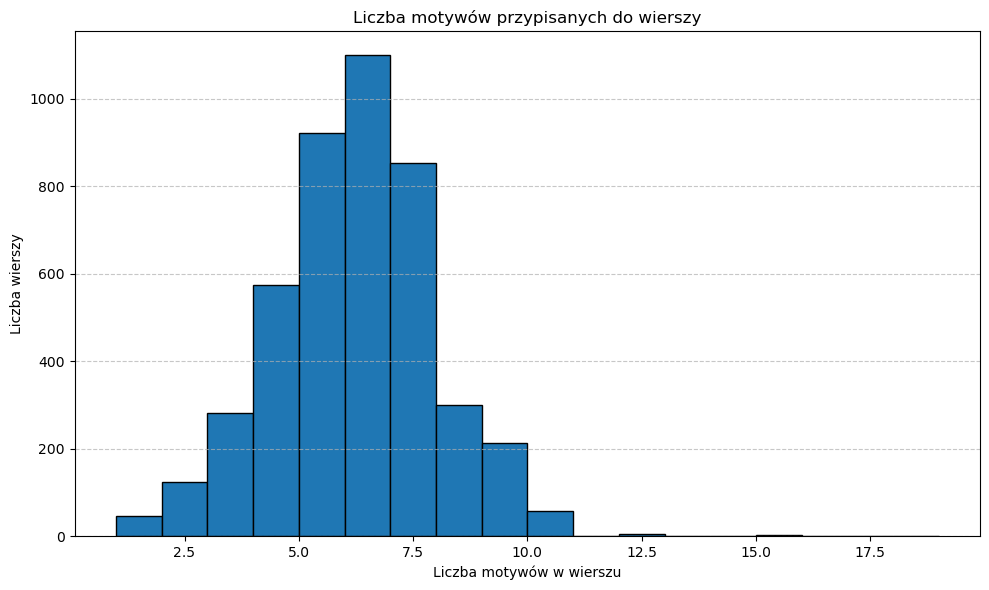

In [254]:
import matplotlib.pyplot as plt

motif_counts_per_poem = data['motifs_list'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(motif_counts_per_poem, bins=range(1, motif_counts_per_poem.max() + 2), edgecolor='black')
plt.title('Liczba motywów przypisanych do wierszy')
plt.xlabel('Liczba motywów w wierszu')
plt.ylabel('Liczba wierszy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# SŁOWA KLUCZOWE

In [200]:
# SŁOWA KLUCZOWE
data['keywords_list'] = data['keywords'].fillna('').apply(lambda x: [kw.strip() for kw in x.split(',')])
all_keywords = [kw for sublist in data['keywords_list'] for kw in sublist if kw]
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(20)
print("\nNajczęściej występujące słowa kluczowe:")
for kw, count in top_keywords:
    print(f"{kw}: {count}")


Najczęściej występujące słowa kluczowe:
życie: 874
serce: 504
miłość: 417
noc: 406
słońce: 399
śmierć: 398
wiatr: 315
Bóg: 285
świat: 256
gwiazdy: 255
cierpienie: 255
kwiaty: 250
ziemia: 237
łzy: 237
smutek: 237
ciemność: 235
światło: 229
czas: 221
dusza: 218
cisza: 204



Statystyki opisowe długości tekstu:
count    4482.000000
mean      276.174699
std       692.936963
min         4.000000
25%        80.000000
50%       127.000000
75%       221.000000
max      7271.000000
Name: word_count, dtype: float64


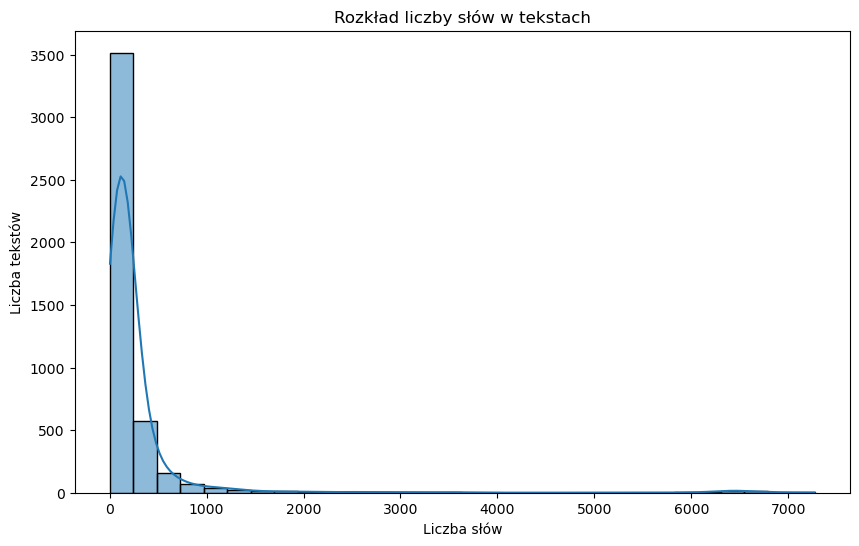

In [202]:
# TEKSTY
def word_count(text):
    tokens = word_tokenize(text)
    return len(tokens)

data['word_count'] = data['content'].apply(word_count)
print("\nStatystyki opisowe długości tekstu:")
print(data['word_count'].describe())

plt.figure(figsize=(10,6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Rozkład liczby słów w tekstach')
plt.xlabel('Liczba słów')
plt.ylabel('Liczba tekstów')
plt.show()


Najczęściej występujące słowa w korpusie:
ja: 2363
lecz: 2279
tylko: 2069
ty: 1946
jeszcze: 1833
jej: 1773
go: 1764
ich: 1548
mu: 1537
ci: 1447
nas: 1417
przed: 1356
sobie: 1354
te: 1341
cię: 1325
kto: 1318
on: 1278
mój: 1267
może: 1267
wszystko: 1266


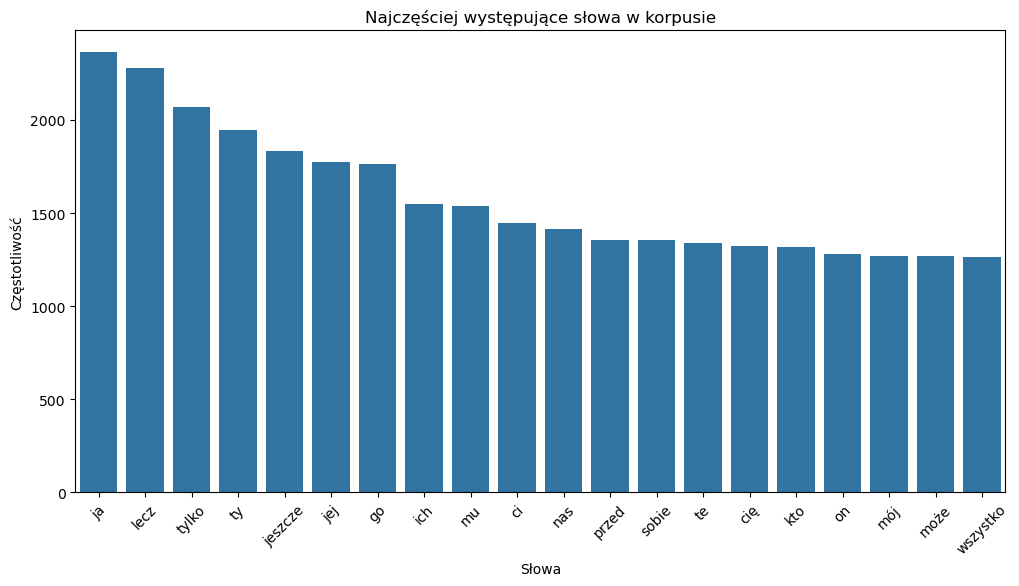

In [206]:

# SŁOWA + KLUCZOWE
all_text = ' '.join(data['content'].dropna())
translator = str.maketrans('', '', string.punctuation)
all_text_clean = all_text.translate(translator)
tokens = word_tokenize(all_text_clean.lower())
polish_stopwords = {
    "się", "i", "w", "z", "na","a", 'za', "o", "do", "jest", "to", "nie", "że", "co", "tak", "jak", "ale",
    "czy", "też", "już", "dla", "przez", "być", "gdy", "albo", "jeśli", "który", "które", "któryś",
    "czyli", "więc", "mnie", "mi", "od", "ten", "ta", "tu", "tam", "po", "czy", "by", "aż", "ze", 'ma',
    'gdzie', 'bo', 'nad', 'pod', 'kiedy', 'bez', 'tym', 'niech', 'nim'
}

tokens_clean = [word for word in tokens if word not in polish_stopwords and word.isalpha()]

word_freq = Counter(tokens_clean)
most_common_words = word_freq.most_common(20)
print("\nNajczęściej występujące słowa w korpusie:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(frequencies))
plt.title('Najczęściej występujące słowa w korpusie')
plt.xlabel('Słowa')
plt.ylabel('Częstotliwość')
plt.xticks(rotation=45)
plt.show()

# RYMY


Rozkład typów rymów:
rhyme
brak            1737
parzysty        1070
krzyżowy         961
okalające        400
nieregularny     297
Name: count, dtype: int64


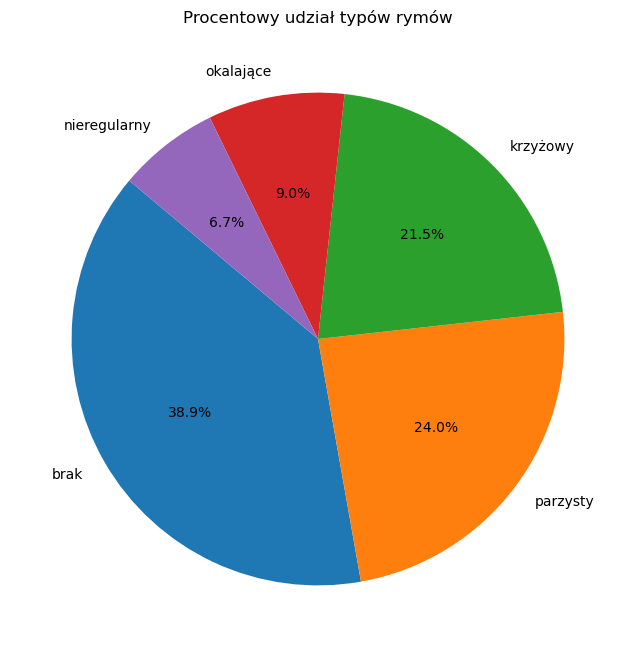

In [211]:
# RYMY
rhyme_counts = data['rhyme'].value_counts()
print("\nRozkład typów rymów:")
print(rhyme_counts)

plt.figure(figsize=(8,8))
rhyme_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Procentowy udział typów rymów')
plt.ylabel('')
plt.show()

In [222]:
from itertools import combinations

motif_pairs = []
for motifs in data['motifs_list']:
    for combo in combinations(sorted(set(motifs)), 2):
        motif_pairs.append(combo)

motif_pair_counts = Counter(motif_pairs)
most_common_pairs = motif_pair_counts.most_common(10)

print("\nNajczęściej współwystępujące pary motywów:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count}")

form_counts = data.groupby(['author', 'type']).size().reset_index(name='count')

most_common_form = (
    form_counts.sort_values(['author', 'count'], ascending=[True, False])
    .drop_duplicates('author')
    .sort_values('author')
)

print("\nNajczęstsza forma literacka każdego autora:")
for _, row in most_common_form.iterrows():
    print(f"- {row['author']}: {row['type']}")


Najczęściej współwystępujące pary motywów:
('czas', 'natura'): 826
('czas', 'życie i śmierć'): 755
('natura', 'życie i śmierć'): 750
('miłość', 'natura'): 640
('miłość', 'życie i śmierć'): 595
('czas', 'przeszłość'): 587
('czas', 'miłość'): 577
('przeszłość', 'życie i śmierć'): 570
('natura', 'przeszłość'): 510
('miłość', 'tęsknota'): 502

Najczęstsza forma literacka każdego autora:
- Adam Asnyk: Sonet
- Adam Kaczanowski: Wiersz
- Adam M-ski (Właśc. Zofia Trzeszczkowska): Wiersz
- Adam Mickiewicz: Wiersz
- Adam Wiedemann: Wiersz
- Adolphe Retté: Wiersz
- Agnieszka Frączek: Wiersz
- Agnieszka Wolny-Hamkało: Wiersz
- Albert Samain: Wiersz
- Aleksander Puszkin: Poemat dygresyjny
- Aleksandra Kasprzak: Wiersz
- Alojzy Feliński: Hymn
- Anatole France: Wiersz
- Anatole Le Braz: Wiersz
- Andrzej Niemojewski: Wiersz
- Andrzej Sosnowski: Wiersz
- Andrzej Trzebiński: Wiersz
- Anna Libera (Anna Krakowianka): Pieśń
- Antanas Baranauskas: Poemat
- Antoni Lange: Wiersz
- Artur Oppman: Wiersz
- Augu

In [253]:
data.to_csv('analiza_poetycka.csv', index=False)